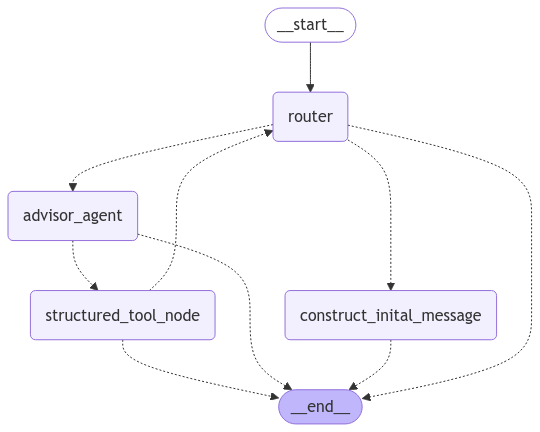

In [1]:
#Graph image
from chatbot.agent import chatbot_graph
from IPython.display import Image, display

try:
    display(Image(chatbot_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [18]:
#workflow inputs

import uuid

from langgraph.types import Command

from chatbot.utils.chatbot_utils import ChatbotContext, ChatbotState
from chatbot.utils.workflow_schema import AppointmentSchedulingTask



chatbot_context = ChatbotContext(
    schema=AppointmentSchedulingTask.model_json_schema()
)

chatbot_config = {"configurable":{"thread_id":uuid.uuid4()}, "chatbot_context":chatbot_context}

chatbot_state = ChatbotState(
    messages=[],
    tool_call_messages=[],
    run_id="0012-05",
    current_extraction_state= {
        "appointments":[
            {
                "client_name":"Derek",
                "date":"02/25/2025",
                "time":"4:00pm"
            }
        ]
    },
    workflows_run=[],
    current_validation_error=None
)

In [19]:
#test workflow
def caller_func(input_obj:ChatbotState|Command, config:dict = chatbot_config)->None:
    for chunk in chatbot_graph.stream(input_obj, config=config):
        for node_id, value in chunk.items():
            if node_id=="__interrupt__":
                print(f"AI Question :\n \t{value[0].value}\n")
                user_input = input(value[0].value)
                print(f"Human response :\n \t {user_input}\n")
                try:
                    caller_func(Command(resume=user_input))
                except Exception as e:
                    print(e)
                    raise e
caller_func(chatbot_state)

AI Question :
 	Hello! To assist us in scheduling appointments effectively, could you please take a moment to fill out the following form? We need details such as the client's name, the date and time of the appointment, and any additional notes. Your input is crucial for our organization and planning. Thank you!

Human response :
 	 i love you

AI Question :
 	It seems like there might have been a misunderstanding. I didn't receive any appointment details. Could you please provide the necessary information so that I can assist you with scheduling?

Human response :
 	 exit



In [20]:
"okay, change my appointment with 'Derek' on '02/25/2025' to '02/21/2025' at '12:00pm', notes=None"

"okay, change my appointment with 'Derek' on '02/25/2025' to '02/21/2025' at '12:00pm', notes=None"

In [21]:
x = chatbot_graph.get_state(chatbot_config).values
{"current_extraction_state":x['current_extraction_state'],
 "workflows_run":x['workflows_run'],
#  "current_validation_error":x['current_validation_error']
}

{'current_extraction_state': {'appointments': [{'client_name': 'Derek',
    'date': '02/25/2025',
    'time': '4:00pm'}]},
 'workflows_run': []}